#Update the initial field after spin-up

In [1]:
import glob
import datetime
import scipy.io
import numpy as np
import netCDF4 as nc
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
sb.set_style('white')

In [3]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [4]:
lev1 = np.arange(35, 95, 5)

In [6]:
#FName1 = '/ocean/yingkai/GEOTRACES/Simulations/BASE01_00350400_restart_trc.nc'
#ptrc_obj = nc.Dataset(FName1)
#d18O = ptrc_obj.variables['TRNd18O'][:]
#nav_lon = ptrc_obj.variables['nav_lon'][:]
#nav_lat = ptrc_obj.variables['nav_lat'][:]

FName2 = '/ocean/yingkai/GEOTRACES/Simulations/BASE03_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj = nc.Dataset(FName2)
nav_lon = ptrc_obj.variables['nav_lon'][:]
nav_lat = ptrc_obj.variables['nav_lat'][:]
Ba = np.squeeze(ptrc_obj.variables['Ba'][-1, :, :, :])
d18O = np.squeeze(ptrc_obj.variables['d18O'][-1, :, :, :])

# Latest update

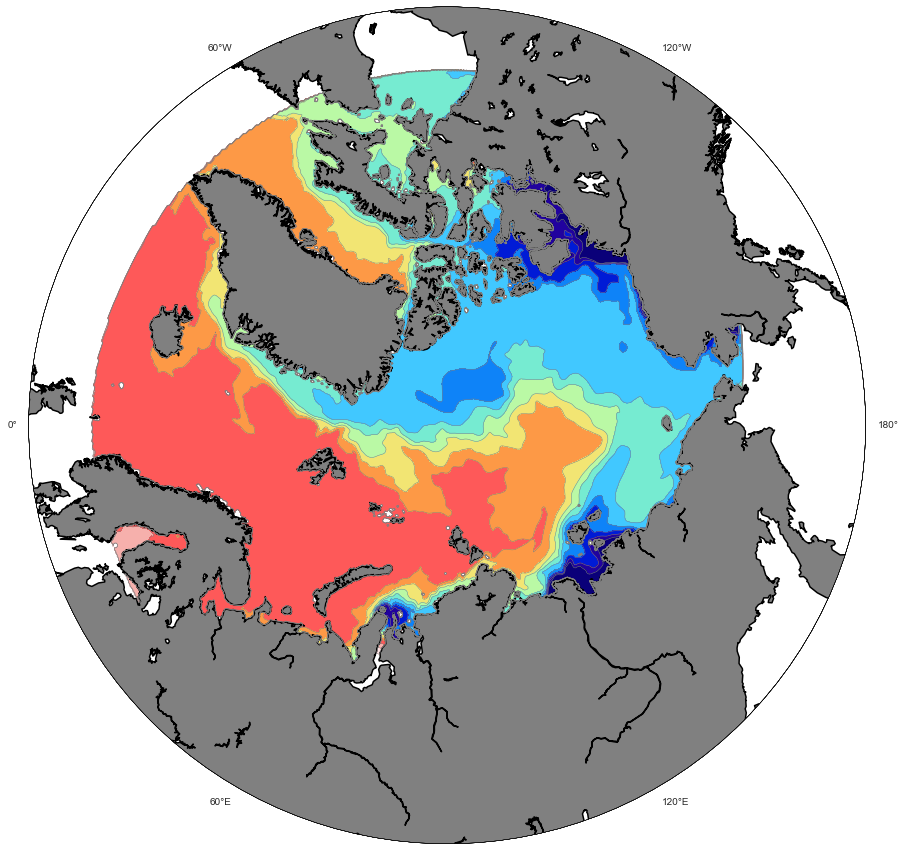

In [7]:


fig=plt.figure(figsize=(15, 15));
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba[0, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
proj.contour(x, y, Ba[0, :, :], lev1, linewidths=0.5, colors=('gray',))

In [8]:
save_var = { 'nav_lon' : np.squeeze(nav_lon),\
             'nav_lat' : np.squeeze(nav_lat),\
             'Ba_ini'  : np.squeeze(Ba),\
             'd18O_ini': np.squeeze(d18O)
            }
scipy.io.savemat('../../_data/Exchange/ANHA4_ini_latest.mat', mdict=save_var)